# Setup
Import TensorFlow and other necessary libraries:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

## Standardize the data

In [6]:
train = ImageDataGenerator(rescale=1./255)
val = ImageDataGenerator(rescale=1./255)

## Create a dataset

In [8]:
train_dir = 'data/train'
val_dir = 'data/test'
train_ds = train.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

val_ds= val.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Create the convolutional base

In [9]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

## Compile and train the mode

In [10]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])

In [12]:
emotion_model_info = emotion_model.fit(
        train_ds,
        steps_per_epoch=28709 // 64,
        epochs=10,
        validation_data=val_ds,
        validation_steps=7178 // 64)

Epoch 1/10
448/448 [==============================] - 233s 521ms/step - loss: 1.7095 - accuracy: 0.3197 - val_loss: 1.6084 - val_accuracy: 0.3934
Epoch 2/10
448/448 [==============================] - 169s 378ms/step - loss: 1.5732 - accuracy: 0.3959 - val_loss: 1.5121 - val_accuracy: 0.4309
Epoch 3/10
448/448 [==============================] - 191s 426ms/step - loss: 1.4899 - accuracy: 0.4289 - val_loss: 1.4406 - val_accuracy: 0.4535
Epoch 4/10
448/448 [==============================] - 174s 387ms/step - loss: 1.4228 - accuracy: 0.4565 - val_loss: 1.3647 - val_accuracy: 0.4845
Epoch 5/10
448/448 [==============================] - 177s 394ms/step - loss: 1.3645 - accuracy: 0.4823 - val_loss: 1.3281 - val_accuracy: 0.4967
Epoch 6/10
448/448 [==============================] - 159s 355ms/step - loss: 1.3177 - accuracy: 0.5002 - val_loss: 1.2963 - val_accuracy: 0.5025
Epoch 7/10
448/448 [==============================] - 169s 377ms/step - loss: 1.2736 - accuracy: 0.5200 - val_loss: 1.2785 -

## Visualize training results
Create plots of the loss and accuracy on the training and validation sets:

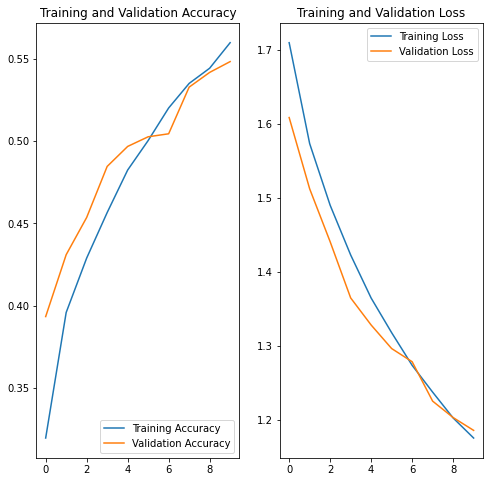

In [14]:
acc = emotion_model_info.history['accuracy']
val_acc = emotion_model_info.history['val_accuracy']

loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

## Predict on new data

In [17]:
from tensorflow.keras.utils import load_img , img_to_array
import numpy as np
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 24ms/step


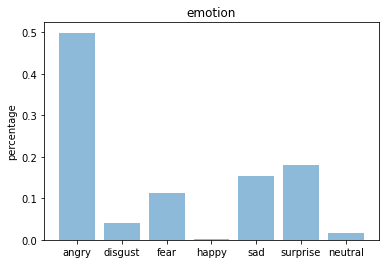

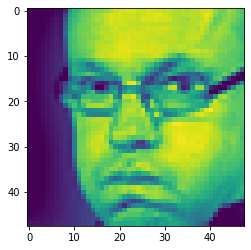

20.13 percent confidence.


In [29]:

file = 'data/test/angry/im106.png'
img=load_img(file,color_mode="grayscale", target_size=(48, 48))

x = img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.imshow(img)
plt.show()
print(
    "{:.2f} percent confidence."
    .format( 100 * np.max(tf.nn.softmax(custom[0])))
)

1/1 [==============================] - 0s 26ms/step


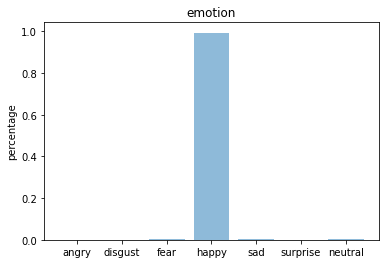

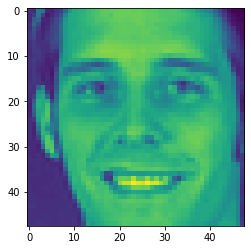

31.02 percent confidence.


In [32]:

file = 'data/test/happy/im100.png'
img=load_img(file,color_mode="grayscale", target_size=(48, 48))

x = img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.imshow(img)
plt.show()
print(
    "{:.2f} percent confidence."
    .format( 100 * np.max(tf.nn.softmax(custom[0])))
)